In [58]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import matplotlib.pyplot as plt


## To Start Chrome Driver

In [2]:
driver=webdriver.Chrome(executable_path='/Users/download/chromedriver')

## Open Insta and provide login credentials

In [3]:
driver.get("https://www.instagram.com/")
driver.maximize_window()
wait_time=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class,'eGOV_')]")))
sample_username='catchy_captures21'
sample_password='fluffy080***'

username_box=driver.find_element_by_name('username')
username_box.send_keys(sample_username)
password_box=driver.find_element_by_name('password')
password_box.send_keys(sample_password)
driver.find_element_by_xpath("//button[contains(@class, 'L3NKy')]/div").click()
waiter=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"cmbtv")))

## Suppressing "Remember Login Info" and "Turn on Notifications" Popup

In [4]:
driver.find_element_by_class_name("cmbtv").click()
waiter=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//button[contains(@class, 'HoLwm')]")))
driver.find_element_by_xpath("//button[contains(@class, 'HoLwm')]").click()
waiter=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'LWmhU')]/input")))

## 1.1. Scraping first 10 instagram handles from 'food' search

In [5]:
search_box=driver.find_element_by_xpath("//div[contains(@class,'LWmhU')]/input")
search_box.send_keys('food')
waiter=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'yCE8d')]/div/div[2]/div/span")))


##each of the handles is opened in a new window to exract the number of followers
food_handles=[]
follower_dict={}
for i in driver.find_elements_by_xpath('//a[contains(@class,"yCE8d")]/div/div[2]/div/span')[0:10]:
    handle_name=i.get_attribute('innerHTML')
    print(handle_name)
    url="https://www.instagram.com/"+ handle_name
    print(url)
    driver.execute_script('window.open(arguments[0]);',url)
    windows=driver.window_handles
    base_window=driver.current_window_handle
    driver.switch_to.window(windows[1])
    #to find total number of followers
    total_followers=driver.find_element_by_xpath('//section[@class="zwlfE"]/ul/li/a/span').get_attribute('title')
    try:
        total_followers=int((total_followers).replace(",",""))
    except AttributeError:
         total_followers=int(total_followers)
    follower_dict[handle_name]=total_followers
    driver.execute_script('window.close();')
    driver.switch_to.window(base_window)



dilsefoodie
https://www.instagram.com/dilsefoodie
foodtalkindia
https://www.instagram.com/foodtalkindia
foodhub_n_love
https://www.instagram.com/foodhub_n_love
foodz.in
https://www.instagram.com/foodz.in
food_first_always
https://www.instagram.com/food_first_always
foodwalkofficial
https://www.instagram.com/foodwalkofficial
food
https://www.instagram.com/food
simply_unique_1
https://www.instagram.com/simply_unique_1
yourfoodlab
https://www.instagram.com/yourfoodlab
_foodiness_
https://www.instagram.com/_foodiness_


In [6]:
#sorting the dictionary based on the number of followers  and printing the top 5 handles with their number of followers
sorted_list=sorted(follower_dict.items(),key=lambda x:x[1],reverse=True)
top_5=sorted_list[:5]
for i in top_5:
    print(i[0],", Followers:",i[1])


yourfoodlab , Followers: 1427207
dilsefoodie , Followers: 630576
foodtalkindia , Followers: 302524
food , Followers: 84453
food_first_always , Followers: 29661


## 1.2. Find the number of posts these handles have done in the previous 3 days

In [7]:
# finding the posts posted by the top 5 handles in the last three days
no_of_posts=[]
for handle in top_5:
    url="https://www.instagram.com/"+ handle[0]
    print(url)
    driver.execute_script('window.open(arguments[0]);',url)
    windows=driver.window_handles
    base_window=driver.current_window_handle
    driver.switch_to.window(windows[1])
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h', 's']:
            count+=1
            print(time_string,end=",")
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
            print(time_string,end=",")
        else:
            driver.find_element_by_xpath("//div[contains(@class,'CkGkG')]/div[contains(@class,'Igw0E')]/button").click()
            break
        driver.find_element_by_xpath("//div[contains(@class,'CkGkG')]/div[contains(@class,'Igw0E')]/button").click()
        time.sleep(1)
    no_of_posts.append(count)
    print(handle[0],"have done", count, "posts in past 3 days")
    driver.execute_script('window.close();')
    driver.switch_to.window(base_window)

    
    
    

https://www.instagram.com/yourfoodlab
2h,1d,2d,3d,3d,yourfoodlab have done 5 posts in past 3 days
https://www.instagram.com/dilsefoodie
22h,1d,2d,2d,dilsefoodie have done 4 posts in past 3 days
https://www.instagram.com/foodtalkindia
3h,1d,2d,foodtalkindia have done 3 posts in past 3 days
https://www.instagram.com/food
21h,1d,2d,3d,food have done 4 posts in past 3 days
https://www.instagram.com/food_first_always
food_first_always have done 0 posts in past 3 days


## 1.3 Depict this information using a suitable graph.

<Figure size 432x288 with 0 Axes>

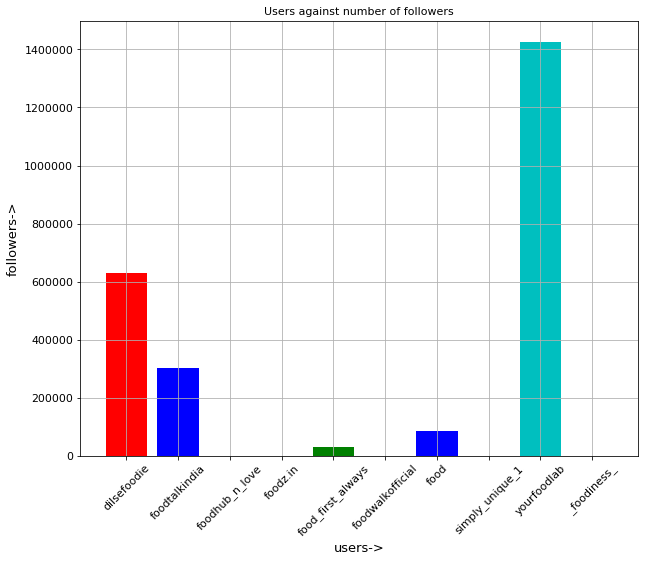

<Figure size 432x288 with 0 Axes>

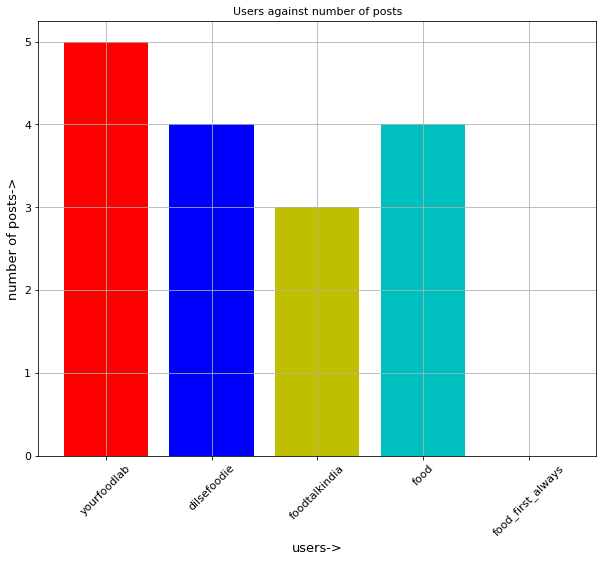

In [8]:
#plotting a graph between 10 users and their number of followers
plt.subplots(0, 0)
plt.figure(figsize=(10, 8))
plt.bar(follower_dict.keys(), follower_dict.values(), color='rbycg')
plt.xticks(rotation=45, size=11)
plt.yticks(size=11)
plt.title('Users against number of followers', size=11)
plt.xlabel('users->', size=13)
plt.ylabel('followers->', size=13)
plt.grid()
plt.show()


#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(10, 8))
plt.bar([x[0] for x in top_5], no_of_posts, color='rbycg')
plt.xticks(rotation=45, size=11)
plt.yticks(size=11)
plt.title('Users against number of posts', size=11)
plt.xlabel('users->', size=13)
plt.ylabel('number of posts->', size=13)
plt.grid()
plt.show()

Thus, we can observe from the graph that:
1. yourfoodlab has the maximum number of followers
2. dilsefoodie have the maximum number of posts in the past three days

## 2.1. Scraping the content from top 10 posts in the previously scraped 5 handles

In [9]:
#saving both content and the hashtags used
content=[]
hashtag_dict={}
for handle in top_5:
    url="https://www.instagram.com/"+ handle[0]
    print(url)
    driver.execute_script('window.open(arguments[0]);',url)
    windows=driver.window_handles
    base_window=driver.current_window_handle
    driver.switch_to.window(windows[1])
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtag=hashes.get_attribute('innerHTML')
            hashtag_dict[hashtag]=hashtag_dict.get(hashtag,0)+1
        count+=1
        driver.find_element_by_xpath("//div[contains(@class,'CkGkG')]/div[contains(@class,'Igw0E')]/button").click()
        if count==10:
            break
    time.sleep(1)
    driver.execute_script('window.close();')
    driver.switch_to.window(base_window)

https://www.instagram.com/yourfoodlab
https://www.instagram.com/dilsefoodie
https://www.instagram.com/foodtalkindia
https://www.instagram.com/food
https://www.instagram.com/food_first_always


In [10]:
driver.switch_to.window(base_window)

## 2.2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [11]:
#preparing a list of words that is used along with their frequency in the scrapped content
import re
word_dict={}
for j in content:
    list_of_words=j.split()
    for i in list_of_words:
        words=re.sub('\W','',i)
        try:
            if words=='':
                continue
            word_dict[words.strip()]=word_dict.get(words.strip(),0)+1
        except IndexError:
            continue
print(word_dict)
        

{'My': 2, 'no': 6, 'onion': 4, 'garlic': 9, 'Quick': 1, 'Veg': 2, 'Pulao': 2, 'Recipe': 5, 'prepped': 1, 'in': 38, 'Cooker': 1, 'recipe': 19, 'is': 38, 'out': 15, 'now': 8, 'on': 27, 'Facebook': 7, 'YouTube': 7, 'Check': 2, 'it': 30, 'Navratri': 2, 'has': 7, 'begun': 1, 'and': 104, 'I': 35, 'got': 3, 'so': 5, 'many': 2, 'requests': 1, 'for': 38, 'recipes': 5, 'without': 1, 'also': 2, 'vrat': 2, 'have': 14, 'prepared': 4, 'both': 3, 'the': 99, 'past': 1, 'this': 24, 'one': 7, 'a': 70, 'quick': 3, 'people': 2, 'who': 7, 'dont': 7, 'consume': 3, 'during': 1, 'festive': 1, 'period': 1, 'The': 6, 'turns': 3, 'super': 3, 'good': 1, 'to': 72, 'prep': 1, 'topped': 3, 'with': 41, 'some': 8, 'cucumber': 3, 'pomegranate': 1, 'almond': 4, 'slivers': 1, 'add': 6, 'that': 10, 'fresh': 1, 'bite': 2, 'do': 16, 'try': 12, 'tastes': 3, 'awesome': 1, 'Also': 1, 'if': 5, 'you': 32, 'ingredients': 3, 'from': 7, 'which': 4, 'used': 3, 'avoid': 3, 'those': 2, 'This': 13, 'not': 3, 'but': 9, 'viewers': 1, 'tu

## 2.3. Create a csv file with two columns : the word and its frequency

In [12]:
import pandas as pd
word_list=[]
for key,value in word_dict.items():
    word_list.append([key,value])
w=pd.DataFrame(word_list,columns=['Word','Frequency'])
w.to_csv('word_freq.csv')

In [13]:
w

,Word,Frequency
0,My,2
1,no,6
2,onion,4
3,garlic,9
4,Quick,1
...,...,...
1411,contentFollow,1
1412,daily,1
1413,dose,1
1414,indiansreetfoodkurkure,1


## 2.4. Hashtags that were most popular among the bloggers

In [14]:
sorted_hashtag_dict=sorted(hashtag_dict.items(),key=lambda x:x[1],reverse=True)
sorted_hashtag_dict

[('#foodporn', 34),
 ('#foodie', 24),
 ('#food', 23),
 ('#foodstagram', 16),
 ('#eeeeeats', 14),
 ('#yummy', 13),
 ('#foodpics', 13),
 ('#f52grams', 11),
 ('#feedfeed', 11),
 ('#mumbaifoodie', 10),
 ('#love', 10),
 ('#instagram', 10),
 ('#mumbaifoodblogger', 10),
 ('#foodfirstalways', 10),
 ('#foodiesofinstagram', 9),
 ('#dilsefoodie', 9),
 ('#foodphotography', 9),
 ('#igers', 9),
 ('#mumbai', 9),
 ('#foodlove', 9),
 ('#drools', 9),
 ('#foodgasm', 9),
 ('#delicious', 9),
 ('#bestoftheday', 9),
 ('#hungry', 9),
 ('#nomnom', 9),
 ('#sogood', 9),
 ('#beautiful', 9),
 ('#instalike', 9),
 ('#sanjyotkeer', 8),
 ('#foodrecipes', 8),
 ('#streetfood', 7),
 ('@sanjyotkeer', 6),
 ('#recipe', 6),
 ('#comfortfood', 6),
 ('#eat', 6),
 ('#tasty', 5),
 ('#lovefood', 5),
 ('#pastalover', 5),
 ('@food_first_always', 5),
 ('#recipeoftheday', 4),
 ('@jadeforestin', 4),
 ('@Food', 4),
 ('#buzzfeast', 4),
 ('#yum', 4),
 ('#feedyoursoul', 4),
 ('#9gag', 4),
 ('#lunch', 4),
 ('#cheatmeal', 4),
 ('#pescatarian

In [15]:
top_5_hashtags=sorted_hashtag_dict[:5]
top_5_hashtags

[('#foodporn', 34),
 ('#foodie', 24),
 ('#food', 23),
 ('#foodstagram', 16),
 ('#eeeeeats', 14)]


## 2.5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

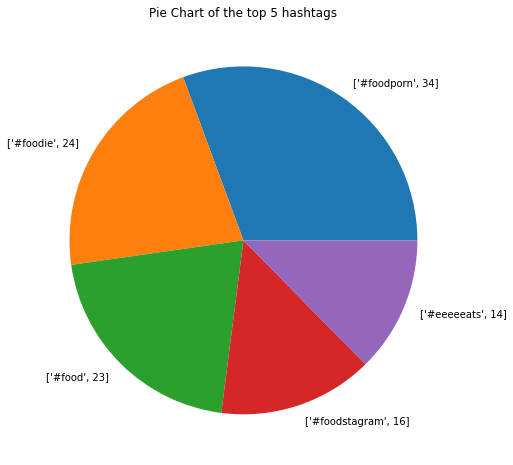

In [79]:
import numpy as np
x=[x[0] for x in top_5_hashtags]
y=[x[1] for x in top_5_hashtags]
plt.figure(figsize=(8, 8))
labels=[]
for i in range(5):
    labels.append([x[i],y[i]])
plt.pie(y, labels=labels, labeldistance=1.1)
plt.title('Pie Chart of the top 5 hashtags',size=12)
plt.show()

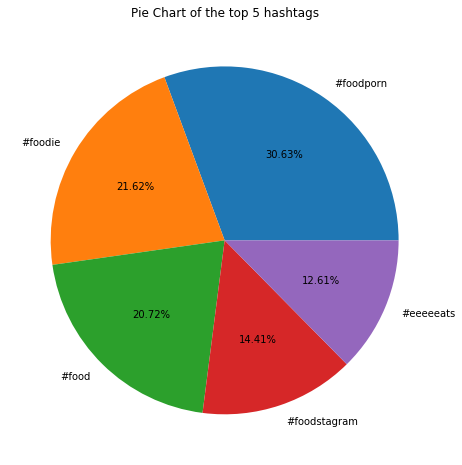

In [78]:
##pie chart with name of the hashtag and the percentage of frequency depicted
import numpy as np
x=[x[0] for x in top_5_hashtags]
y=[x[1] for x in top_5_hashtags]
plt.figure(figsize=(8, 8))
plt.pie(y, labels=x, autopct = '%.2f%%', labeldistance=1.1)
plt.title('Pie Chart of the top 5 hashtags',size=12)
plt.show()

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [37]:
likes_list=[]
for handle in top_5:
    url="https://www.instagram.com/"+ handle[0]
    print(url)
    driver.execute_script('window.open(arguments[0]);',url)
    windows=driver.window_handles
    base_window=driver.current_window_handle
    driver.switch_to.window(windows[1])
    count=0
    likes=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        driver.execute_script("arguments[0].click();", i)
        try:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "sqdOP")]/span')))
            like_str=driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "sqdOP")]/span').get_attribute('innerHTML')
            try:
                likes+=int((like_str).replace(",",""))
            except AttributeError:
                likes+=int(like_str)
        except TimeoutException:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            like_str=driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML')
            try:
                likes+=int((like_str).replace(",",""))
            except AttributeError:
                likes+=int(like_str)
        count+=1
        if count>=10:
            driver.find_element_by_xpath("//div[contains(@class,'CkGkG')]/div[contains(@class,'Igw0E')]/button").click()
            break
        time.sleep(1)
    print("A total of ", likes, "likes on 10 latest posts")
    likes_list.append(likes)
    time.sleep(1)
    driver.execute_script('window.close();')
    driver.switch_to.window(base_window)

https://www.instagram.com/yourfoodlab
A total of  1035831 likes on 10 latest posts
https://www.instagram.com/dilsefoodie
A total of  929201 likes on 10 latest posts
https://www.instagram.com/foodtalkindia
A total of  25876 likes on 10 latest posts
https://www.instagram.com/food
A total of  28274 likes on 10 latest posts
https://www.instagram.com/food_first_always
A total of  4541 likes on 10 latest posts


## 3.2 Calculating the average likes for each handle

In [41]:
likes_list=np.array(likes_list)
likes_list

array([1035831,  929201,   25876,   28274,    4541])

In [42]:
avg_likes=likes_list/10
avg_likes

array([103583.1,  92920.1,   2587.6,   2827.4,    454.1])

In [46]:
top_5

[('yourfoodlab', 1427207),
 ('dilsefoodie', 630576),
 ('foodtalkindia', 302524),
 ('food', 84453),
 ('food_first_always', 29661)]

## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [50]:
#for getting average followers to likes ratio
like_ratio=[]
for i in range(5):
    ratio=top_5[i][1]/avg_likes[i]
    like_ratio.append([top_5[i][0],ratio])


In [52]:
like_ratio

[['yourfoodlab', 13.778376974622308],
 ['dilsefoodie', 6.786217406137101],
 ['foodtalkindia', 116.91296954707065],
 ['food', 29.869491405531583],
 ['food_first_always', 65.31821184761066]]

## 3.4 Create a bar graph to depict the above obtained information.

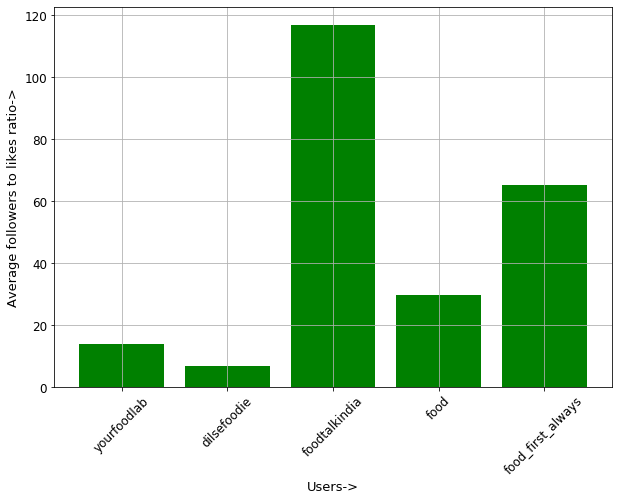

In [57]:
#plotting the graph between average followers to likes ratio and users.
plt.figure(figsize=(10,7))
plt.bar([x[0] for x in like_ratio],[x[1] for x in like_ratio], color='green')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users->', size=13)
plt.ylabel('Average followers to likes ratio->', size=13)
plt.yticks(size=12)
plt.grid()
plt.show()